# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [2]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [23]:
diwali = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-11-14/diwali_sales_data.csv',
    col_types = cols()
)

head(diwali)

User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877


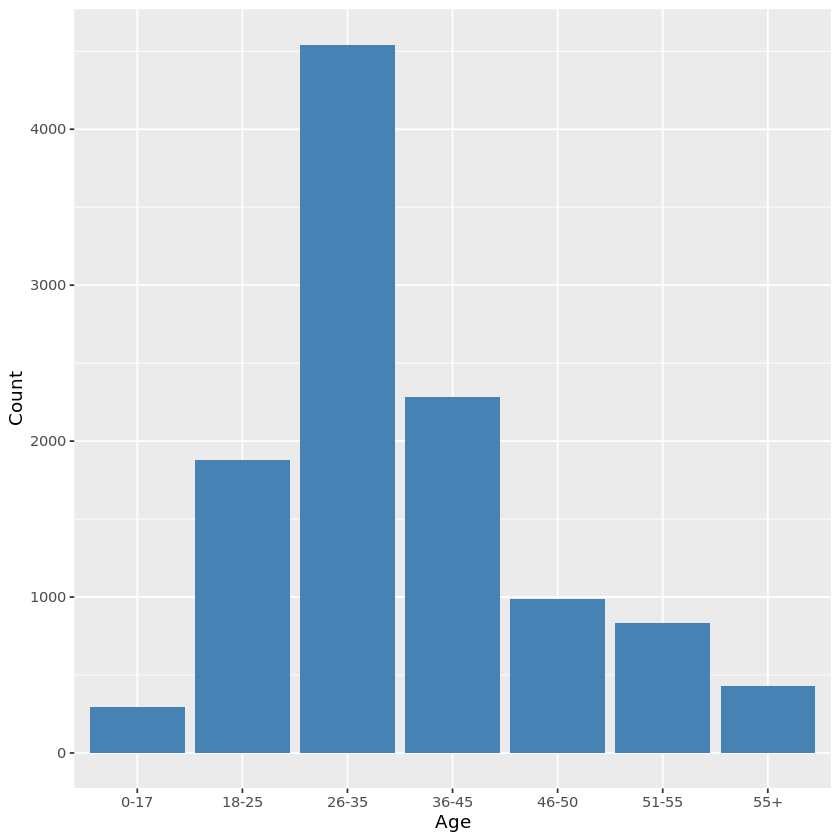

In [15]:
diwali |> ggplot(aes(y = `Age Group`)) +
          geom_bar(fill= 'steelblue') +
          coord_flip() +
          labs(x = 'Count', y = 'Age')


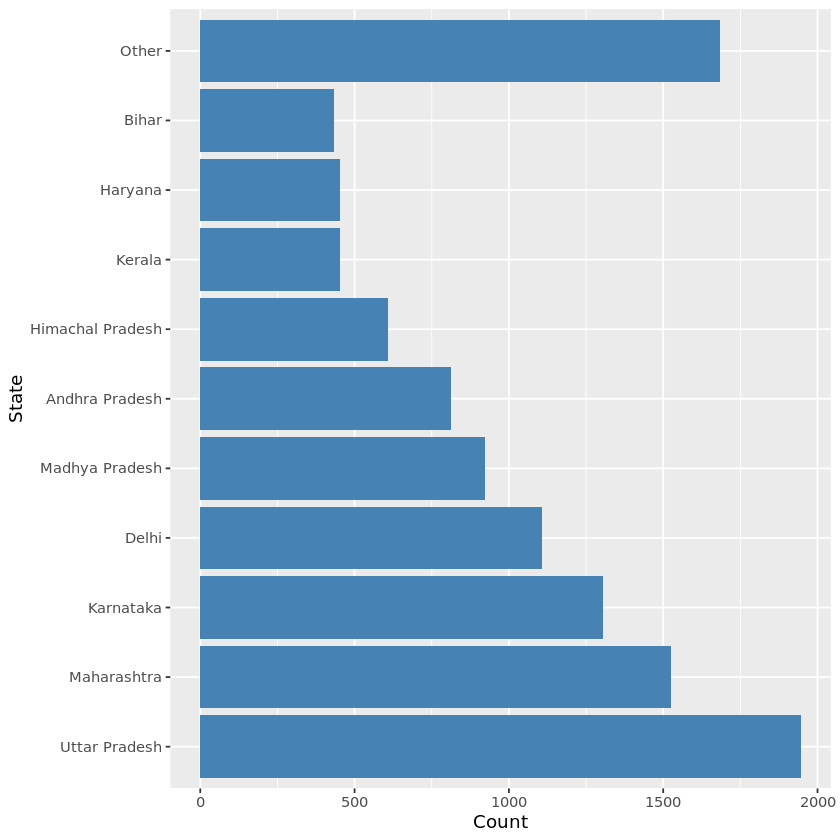

In [16]:
diwali2 = diwali |>
    mutate(state_lumped = State |> fct_infreq()  |> fct_lump_n(10))

diwali2 |>
    ggplot(aes(y = state_lumped)) +
    geom_bar(fill= 'steelblue') +
    labs(x = 'Count', y = 'State')


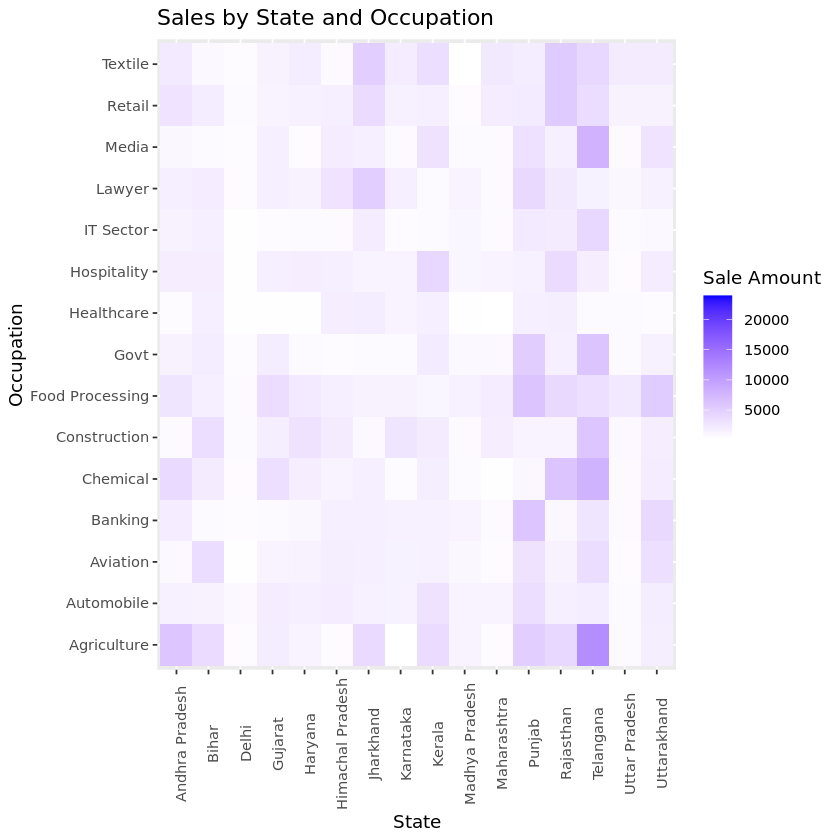

In [24]:
diwali3 = diwali |> 
  filter(!is.na(Amount))

diwali3 |> ggplot(aes(State, Occupation, fill = Amount)) +
           geom_tile() + 
           scale_fill_gradient(low="white", high="blue") + 
           theme(axis.text.x = element_text(angle = 90)) +
           labs(title="Sales by State and Occupation", 
                x = "State",
                y = "Occupation",
                fill="Sale Amount")

The age barchart provides a breakdown of the age distribution of customers in the dataset. We can see the majority fall into the 26-35 years old range, with 4500 customers. The 18-25 and 36-45 groups represent the next largest segments at around 2,000 customers each. There is then a dropoff for the 46-50 and 51-55+ groups. This suggests the bulk of customers are young to middle aged adults.

The state barchart and occupation/state heatmap also provide additional demographic insights. The state chart shows that Uttar Pradesh, Maharashtra, and Karnataka are the states with the most customers, collectively representing roughly 50% of the data. When viewed alongside the heatmap, we do not really see a strong intersections between certain states and occupations. However, we see that customers that were from Telangana and were in the Agricultural industry spent the most.